In [12]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

cwd = os.getcwd()
if cwd.endswith('notebook/PG'):
    os.chdir('../..')
    cwd = os.getcwd()

from src.pg_modelling.ligand_utils import sanitize_ligand_name

In [41]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
sns.set_palette('colorblind')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.8)
plt.rcParams['font.family'] = 'Helvetica'

palette = sns.color_palette().as_hex()

In [33]:
pg_modelling_folder = Path(os.path.expanduser('~')) / 'Documents' / 'PG_modelling'
data_folder = pg_modelling_folder / 'Lysostaphin_P10547'
assert data_folder.is_dir()

# Lysostaphin SH3b domain

- Bridge crosslink from S. aureus: pentaglycine (main positive control)
- Bridge crosslink from S. aureus: GGSGG (main negative control)
- Bridge crosslink from S. equi: two Alanine (negative control)
- Direct crosslink from E. coli (negative control)
- Any odd lipid in the same molecular weight ballpark (negative control)

In [34]:
E_coli_libary = pg_modelling_folder / 'PG_library' / 'Escherichia_coli' / 'E_coli_cell_wall_library.xlsx'
S_equi_libary = pg_modelling_folder / 'PG_library' / 'Streptococcus_equi' / 'S_equi_cell_wall_library.xlsx'
S_aureus_libary = pg_modelling_folder / 'PG_library' / 'Staphylococcus_aureus' / 'S_aureus_cell_wall_library.xlsx'

pg_library = pd.concat(
    [
        pd.read_excel(
            E_coli_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            E_coli_libary,
            sheet_name=1,
        ),
        pd.read_excel(
            S_equi_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            S_equi_libary,
            sheet_name=1,
        ),
        pd.read_excel(
            S_aureus_libary,
            sheet_name=0,
        ),
        pd.read_excel(
            S_aureus_libary,
            sheet_name=1,
        ),
    ],
    ignore_index=True,
)
pg_library['ligand_id'] = pg_library['Name'].apply(sanitize_ligand_name)
pg_library = pg_library.drop_duplicates('ligand_id')
pg_library = pg_library.set_index('ligand_id')
print(f'N = {len(pg_library):,}')

N = 2,553


In [56]:
subset_ids = [
    'KA-3-NH2-GGGGG-3br-4-qKA',
    'KA-3-NH2-GGSGG-3br-4-qKA',
    'KA-3-NH2-AA-3br-4-qKA',
    'mA-3s-4-emA',
]
pg_library_subset = pg_library.loc[subset_ids].rename(columns={
    'SMILES': 'smiles',
    'Monoisotopic Mass': 'mass',
})[['smiles', 'mass']]
print(f'N = {len(pg_library_subset):,}')
pg_library_subset

N = 4


,smiles,mass
ligand_id,,
KA-3-NH2-GGGGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)CNC(=O)CN...,829.44061
KA-3-NH2-GGSGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)C(CO)NC(=...,859.45118
KA-3-NH2-AA-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)C(C)NC(=O)C(C)NC(=O)C(C...,686.40752
mA-3s-4-emA,CC(NC(=O)C(N)CCCC(NC(=O)C(C)NC(=O)C(CCCC(N)C(=...,633.29697


In [57]:
# Pick larg-ish lipid from E. coli: (3S)-citryl-CoA
lipid_maps = pd.read_csv(pg_modelling_folder / 'PG_library' / 'lipid_maps' / 'lipids.csv')
lipid_df = lipid_maps[lipid_maps['NAME'] == '(3S)-citryl-CoA'].copy()
lipid_df['ligand_id'] = lipid_df['NAME'].apply(lambda n: f'lipid-{sanitize_ligand_name(n)}')
lipid_df = lipid_df.set_index('ligand_id').rename(columns={
    'SMILES': 'smiles',
    'EXACT_MASS': 'mass',
})[['smiles', 'mass']]

ligands_df = pd.concat([pg_library_subset, lipid_df])
ligands_df.to_csv(data_folder / 'ligands.csv')
print(f'N = {len(ligands_df):,}')
ligands_df

N = 5


,smiles,mass
ligand_id,,
KA-3-NH2-GGGGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)CNC(=O)CN...,829.440610
KA-3-NH2-GGSGG-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)CNC(=O)CNC(=O)C(CO)NC(=...,859.451180
KA-3-NH2-AA-3br-4-qKA,CC(NC(=O)C(N)CCCCNC(=O)C(C)NC(=O)C(C)NC(=O)C(C...,686.407520
mA-3s-4-emA,CC(NC(=O)C(N)CCCC(NC(=O)C(C)NC(=O)C(CCCC(N)C(=...,633.296970
lipid-3S-citryl-CoA,CC(C)(COP(=O)(O)OP(=O)(O)OC[C@H]1O[C@@H](n2cnc...,941.131659


## Results

In [45]:
def sort_and_drop_duplicates(df):
    out_df = df.reset_index().sort_values(
        [
            'protein_name', 'ligand_name', 'posebusters_score', 'confidence', 'aev_plig_pK'
        ],
        ascending=False,
    ).drop_duplicates(
        ['protein_name', 'ligand_name']
    ).set_index('ligand_name')

    return out_df.sort_values(
        [
            'posebusters_score', 'confidence', 'aev_plig_pK'
        ],
        ascending=False
    )

In [48]:
colors = {
    'KA-3-NH2-GGGGG-3br-4-qKA': '#3cb44b',
    'KA-3-NH2-GGSGG-3br-4-qKA': '#e6194B',
    'KA-3-NH2-AA-3br-4-qKA': '#4363d8',
    'mA-3s-4-emA': '#9A6324',
    'lipid-3S-citryl-CoA': '#aaaaaa',
}
def plot_confidence_vs_pk(df):
    ligands = sorted(set(df.index))
    ax = df.plot.scatter(
        x='confidence', 
        y='aev_plig_pK',
        c=[colors[l] for l in df.index],
        alpha=[
            1.0 if row['posebusters_score'] == 20 else 0.2
            for _, row in df.iterrows()
        ],
    );
    legend_handles = [
        mlines.Line2D([], [], color=colors[l], marker='o', linestyle='None', markersize=6, label=l)
        for l in ligands
    ]
    ax.legend(handles=legend_handles, bbox_to_anchor=(1.0, 1.0), frameon=False);
    return ax

### AF3

In [47]:
af3_results_all = pd.read_csv(data_folder / 'modelling' / 'af3' / 'scores.csv', index_col='ligand_name')
af3_results = sort_and_drop_duplicates(af3_results_all)
af3_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
KA-3-NH2-GGSGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,523,4,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.90,0.85,0.860,20,3.8,NaN,5.13
KA-3-NH2-GGGGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,384,4,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.90,0.84,0.852,20,3.5,NaN,4.98
KA-3-NH2-AA-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,994,4,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.88,0.80,0.816,20,2.6,NaN,5.00
mA-3s-4-emA,Lysostaphin_P10547_SH3b_413_493,609,1,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.88,0.80,0.816,20,4.0,NaN,4.89
lipid-3S-citryl-CoA,Lysostaphin_P10547_SH3b_413_493,34,3,/home/rs1521/PG/Lysostaphin_P10547/modelling/a...,0.83,0.73,0.750,20,3.8,NaN,6.15


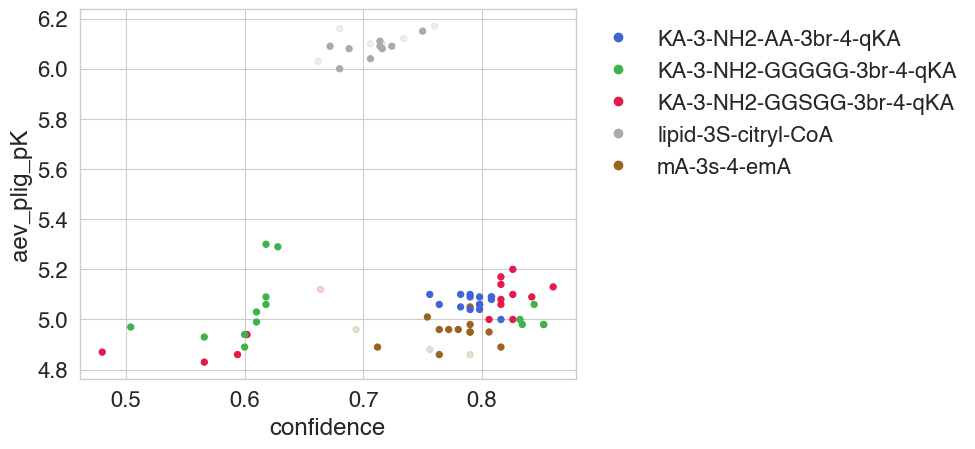

In [49]:
plot_confidence_vs_pk(af3_results_all);

### Boltz

In [50]:
boltz_results_all = pd.read_csv(data_folder / 'modelling' / 'boltz' / 'scores.csv', index_col='ligand_name')
boltz_results = sort_and_drop_duplicates(boltz_results_all)
boltz_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
mA-3s-4-emA,Lysostaphin_P10547_SH3b_413_493,510,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.859720,0.674538,0.712,20,9.9,NaN,5.14
KA-3-NH2-GGGGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,763,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.830767,0.632612,0.672,20,8.3,NaN,5.02
KA-3-NH2-GGSGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,510,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.785058,0.545333,0.593,20,7.3,NaN,5.04
lipid-3S-citryl-CoA,Lysostaphin_P10547_SH3b_413_493,510,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.757148,0.521175,0.568,20,5.1,NaN,6.13
KA-3-NH2-AA-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,318,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.758850,0.411586,0.481,20,6.7,NaN,5.18


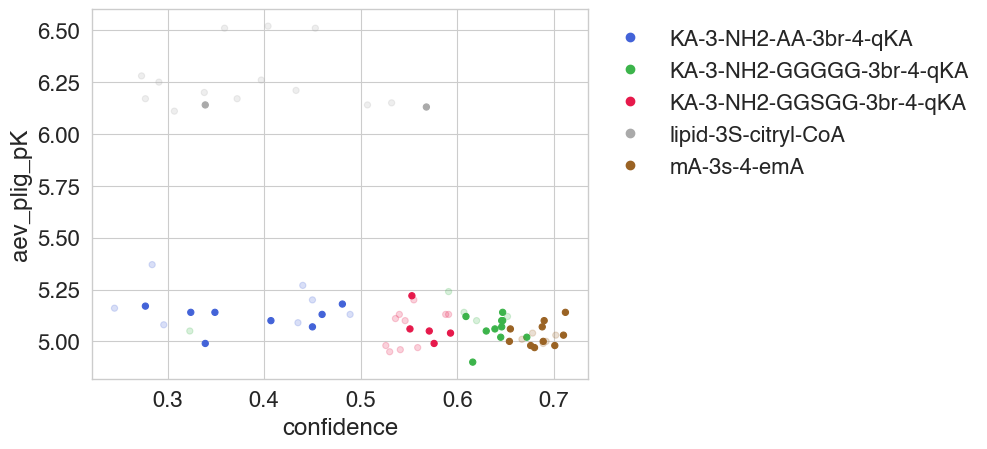

In [51]:
plot_confidence_vs_pk(boltz_results_all);

### Chai

In [52]:
chai_results_all = pd.read_csv(data_folder / 'modelling' / 'chai' / 'scores.csv', index_col='ligand_name')
chai_results = sort_and_drop_duplicates(chai_results_all)
chai_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
lipid-3S-citryl-CoA,Lysostaphin_P10547_SH3b_413_493,776,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.883407,0.674281,0.716,20,5.6,NaN,6.12
mA-3s-4-emA,Lysostaphin_P10547_SH3b_413_493,687,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.899853,0.630862,0.685,20,7.2,NaN,4.96
KA-3-NH2-GGGGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,411,4,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.811455,0.465776,0.535,20,3.1,NaN,4.95
KA-3-NH2-GGSGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,411,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.785171,0.409901,0.485,20,5.0,NaN,5.11
KA-3-NH2-AA-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,411,2,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.814335,0.398552,0.482,20,3.1,NaN,4.93


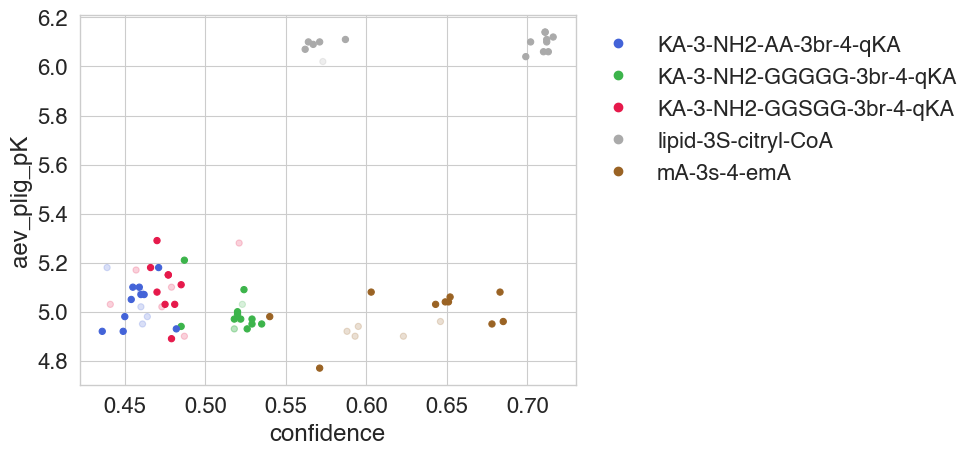

In [53]:
plot_confidence_vs_pk(chai_results_all);

### Protenix

In [54]:
protenix_results_all = pd.read_csv(data_folder / 'modelling' / 'protenix' / 'scores.csv', index_col='ligand_name')
protenix_results = sort_and_drop_duplicates(protenix_results_all)
protenix_results

,protein_name,seed,sample,structure_file,ptm,iptm,confidence,posebusters_score,energy_ratio,posebusters_errors,aev_plig_pK
ligand_name,,,,,,,,,,,
mA-3s-4-emA,Lysostaphin_P10547_SH3b_413_493,323,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.977853,0.963242,0.966,20,14.8,NaN,4.90
KA-3-NH2-AA-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,944,3,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.968957,0.940900,0.947,20,10.8,NaN,4.96
KA-3-NH2-GGSGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,185,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.958490,0.922738,0.930,20,4.4,NaN,4.96
KA-3-NH2-GGGGG-3br-4-qKA,Lysostaphin_P10547_SH3b_413_493,323,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.950813,0.901985,0.912,20,4.2,NaN,4.84
lipid-3S-citryl-CoA,Lysostaphin_P10547_SH3b_413_493,185,0,/gpfs/home/rs1521/PG/Lysostaphin_P10547/modell...,0.946691,0.895257,0.906,20,4.2,NaN,6.01


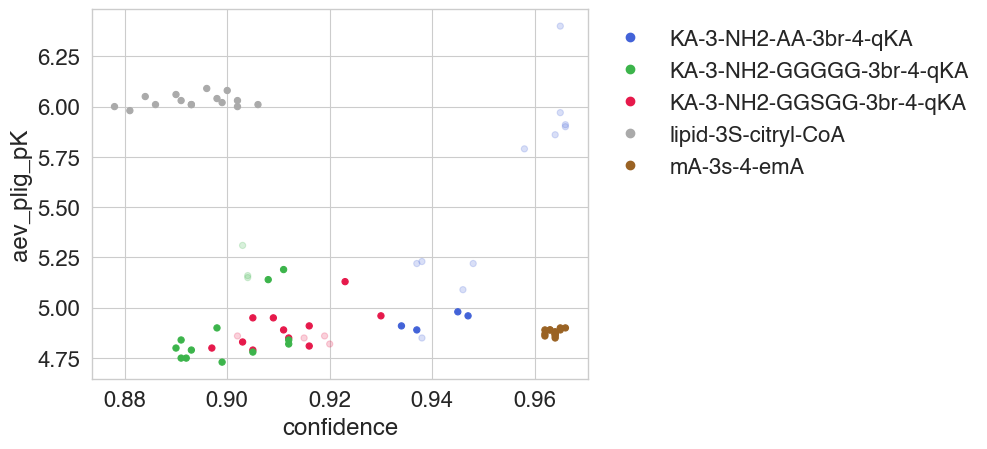

In [55]:
plot_confidence_vs_pk(protenix_results_all);